# **Data Loading & Exploration**

In [ ]:
from pprint import pprint
from time import time

import missingno as msno
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df3 = pd.read_csv("/content/drive/MyDrive/MSIB RUANG GURU/datajoin3.csv")


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301522 entries, 0 to 301521
Data columns (total 29 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              301522 non-null  int64  
 1   first_name      301522 non-null  object 
 2   last_name       301522 non-null  object 
 3   age             301522 non-null  int64  
 4   gender          301522 non-null  object 
 5   state           301522 non-null  object 
 6   city            298583 non-null  object 
 7   country         301522 non-null  object 
 8   latitude        301522 non-null  float64
 9   longitude       301522 non-null  float64
 10  traffic_source  301522 non-null  object 
 11  created_at      301522 non-null  object 
 12  id-2            270623 non-null  float64
 13  order_id        270623 non-null  float64
 14  user_id         270623 non-null  float64
 15  product_id      270623 non-null  float64
 16  status          270623 non-null  object 
 17  created_at

In [ ]:
print("jumlah baris data pemesanan:", df3.shape[0])
print("jumlah baris data pemesanan:", df3.shape[1])

jumlah baris data pemesanan: 301522
jumlah baris data pemesanan: 29


In [ ]:
df3.head()

,id,first_name,last_name,age,gender,state,city,country,latitude,longitude,...,delivered_at,returned_at,sale_price,gender-2,num_of_item,category,name,brand,retail_price,department
0,47846,Linda,Suarez,45,F,Cataluña,Mataró,Spain,41.540629,2.448863,...,NaN,NaN,2.5,F,2.0,Accessories,Elegant PASHMINA SCARF WRAP SHAWL STOLE,Scarf_tradinginc,2.5,Women
1,56546,Derek,Joseph,18,M,North Carolina,Raleigh,United States,35.813127,-78.717292,...,2022-05-08 16:18:00,2022-05-10 04:53:00,3.5,M,2.0,Accessories,Charming Mens Initial Embroidered Cotton Handk...,Greatlookz,3.5,Men
2,93034,Tiffany,Bradford,13,F,California,Glendora,United States,34.156720,-117.844156,...,2021-12-05 21:58:00,2021-12-06 03:53:00,3.5,F,2.0,Plus,Dainty Floral Embroidered Cotton Handkerchief ...,Greatlookz,3.5,Women
3,47864,Timothy,Hunt,25,M,Gyeonggi-do,Gunpo City,South Korea,37.334403,126.936470,...,NaN,NaN,4.5,M,2.0,Socks,Burlington Casual Acrylic Crew Sock,Burlington Socks,4.5,Men
4,2662,Richard,Williams,50,M,Jeollanam-do,Mokpo City,South Korea,34.806894,126.442952,...,2022-05-12 19:05:00,2022-05-14 20:10:00,4.5,M,1.0,Accessories,Blank Cuff Beanie Visor (Comes In Many Differe...,blank apparel,4.5,Men


In [ ]:
df3.drop(columns=[   "state","latitude", "longitude", "city", "retail_price",  "gender-2"], inplace = True)

In [ ]:
df3.loc[0]

id                                                  47846
first_name                                          Linda
last_name                                          Suarez
age                                                    45
gender                                                  F
country                                             Spain
traffic_source                                    Organic
created_at                      2021-08-22 11:38:00+00:00
id-2                                              85756.0
order_id                                          59418.0
user_id                                           47846.0
product_id                                        13606.0
status                                          Cancelled
created_at-2                          2022-05-22 11:36:45
shipped_at                                            NaN
delivered_at                                          NaN
returned_at                                           NaN
sale_price    

# **Dictionary**


| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id                   | ID user                                                                                       |
| first_name           | Nama depan User                                                                                          |
| last_name            | Nama belakang User                                                                                   |
| age                  | Usia User                                                                                           |
| gender               | Jenis kelamin User                                                                                         |
| country              | Asal negara User                                                                                  |
| traffic_source       | Asal User mendapati situs ini                                                                                   |
| created_at           | Waktu yang tercatat saat User membuat akun                                                                              |
| id-2                 | ID order items                                                                       |
| order_id             | ID order                                                                                              |
| user_id              | ID User                                                                            |
| product_id           | ID Product                                 |
| status               | Status Order                                                                  |
| created_at-2         | Waktu yang dicatat saat order dipesan                                                                              |
| shipped_at           | Waktu yang dicatat saat order dikemas                                                                                                  |
| delivered_at         | Waktu yang dicatat saat order dikirim                                                                               |
| returned_at          | Waktu yang dicatat saat order dikembalikan oleh User                                                                                                    |
| sale_price           | Harga jual barang                                                                                          |
| num_of_item          | Jumlah item yang dipesan                                                                                        |
| category             | Kategori dari produk |
| name                 | Nama dari produk                                                             |
| brand                | Brand dari produk                                                            |


In [ ]:
df3.tail(3)

,id,first_name,last_name,age,gender,country,traffic_source,created_at,id-2,order_id,...,created_at-2,shipped_at,delivered_at,returned_at,sale_price,num_of_item,category,name,brand,department
301519,99846,Brian,Smith,35,M,United States,Search,2020-01-06 06:40:00+00:00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
301520,50461,Terry,Russo,15,F,China,Search,2020-11-24 09:19:00+00:00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
301521,37404,Carrie,Mckinney,60,F,South Korea,Search,2020-08-15 08:50:00+00:00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **EDA**

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301522 entries, 0 to 301521
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              301522 non-null  int64  
 1   first_name      301522 non-null  object 
 2   last_name       301522 non-null  object 
 3   age             301522 non-null  int64  
 4   gender          301522 non-null  object 
 5   country         301522 non-null  object 
 6   traffic_source  301522 non-null  object 
 7   created_at      301522 non-null  object 
 8   id-2            270623 non-null  float64
 9   order_id        270623 non-null  float64
 10  user_id         270623 non-null  float64
 11  product_id      270623 non-null  float64
 12  status          270623 non-null  object 
 13  created_at-2    270623 non-null  object 
 14  shipped_at      176009 non-null  object 
 15  delivered_at    94806 non-null   object 
 16  returned_at     26695 non-null   object 
 17  sale_price

In [ ]:
from datetime import datetime
for feature in df3.columns:
    if (
        feature.endswith("at")
        
    ):
        df3[feature] = df3[feature].astype("datetime64")

In [ ]:
df3. rename(columns = {'created_at-2':'order_at'}, inplace = True)

In [ ]:
df3["order_at"] = df3["order_at"].astype("datetime64")

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301522 entries, 0 to 301521
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   id              301522 non-null  int64         
 1   first_name      301522 non-null  object        
 2   last_name       301522 non-null  object        
 3   age             301522 non-null  int64         
 4   gender          301522 non-null  object        
 5   country         301522 non-null  object        
 6   traffic_source  301522 non-null  object        
 7   created_at      301522 non-null  datetime64[ns]
 8   id-2            270623 non-null  float64       
 9   order_id        270623 non-null  float64       
 10  user_id         270623 non-null  float64       
 11  product_id      270623 non-null  float64       
 12  status          270623 non-null  object        
 13  order_at        270623 non-null  datetime64[ns]
 14  shipped_at      176009 non-null  dat

### Data Duplikat

In [ ]:
df3[df3.duplicated()].count()

id                101000
first_name        101000
last_name         101000
age               101000
gender            101000
country           101000
traffic_source    101000
created_at        101000
id-2               90115
order_id           90115
user_id            90115
product_id         90115
status             90115
order_at           90115
shipped_at         58507
delivered_at       31771
returned_at         8943
sale_price         90115
num_of_item        90115
category           90115
name               90106
brand              90035
department         90115
dtype: int64

In [ ]:
df3[df3.duplicated()].head(2)

,id,first_name,last_name,age,gender,country,traffic_source,created_at,id-2,order_id,...,order_at,shipped_at,delivered_at,returned_at,sale_price,num_of_item,category,name,brand,department
102000,56392,Robert,Lewis,18,M,Brasil,Search,2020-02-02 11:32:00,101442.0,70229.0,...,2020-05-12 11:01:23,2020-05-09 11:11:00,NaT,NaT,20.0,2.0,Underwear,Diesel Men's Kory Boxer,Diesel,Men
102001,61607,Natalie,Mcgrath,27,F,China,Display,2022-04-17 05:38:00,111009.0,76823.0,...,2022-05-06 03:42:06,2022-05-06 03:53:00,NaT,NaT,20.0,2.0,Plus,Calvin Klein Men's 3 Pack No Show Liner Socks,Calvin Klein,Women


In [ ]:
## mengecek data yang duplikat
df3[(df3['first_name'] == "Crystal") & (df3['last_name'] == "Pearson")]

,id,first_name,last_name,age,gender,country,traffic_source,created_at,id-2,order_id,...,order_at,shipped_at,delivered_at,returned_at,sale_price,num_of_item,category,name,brand,department
59997,92063,Crystal,Pearson,17,F,China,Search,2019-03-30 10:56:00,165914.0,114597.0,...,2019-08-10 07:06:37,2019-08-10 21:39:00,NaT,NaT,26.98,1.0,Maternity,Motherhood Maternity: Long Sleeve Pull Down Nu...,Motherhood Maternity,Women
214997,92063,Crystal,Pearson,17,F,China,Search,2019-03-30 10:56:00,165914.0,114597.0,...,2019-08-10 07:06:37,2019-08-10 21:39:00,NaT,NaT,26.98,1.0,Maternity,Motherhood Maternity: Long Sleeve Pull Down Nu...,Motherhood Maternity,Women


In [ ]:
## menghapus data duplikat
data = df3.drop_duplicates()
data.head()

,id,first_name,last_name,age,gender,country,traffic_source,created_at,id-2,order_id,...,order_at,shipped_at,delivered_at,returned_at,sale_price,num_of_item,category,name,brand,department
0,47846,Linda,Suarez,45,F,Spain,Organic,2021-08-22 11:38:00,85756.0,59418.0,...,2022-05-22 11:36:45,NaT,NaT,NaT,2.5,2.0,Accessories,Elegant PASHMINA SCARF WRAP SHAWL STOLE,Scarf_tradinginc,Women
1,56546,Derek,Joseph,18,M,United States,Search,2019-07-23 04:38:00,101706.0,70412.0,...,2022-05-02 02:18:01,2022-05-03 22:20:00,2022-05-08 16:18:00,2022-05-10 04:53:00,3.5,2.0,Accessories,Charming Mens Initial Embroidered Cotton Handk...,Greatlookz,Men
2,93034,Tiffany,Bradford,13,F,United States,Search,2019-05-31 14:28:00,167695.0,115816.0,...,2021-12-04 10:58:23,2021-12-04 21:43:00,2021-12-05 21:58:00,2021-12-06 03:53:00,3.5,2.0,Plus,Dainty Floral Embroidered Cotton Handkerchief ...,Greatlookz,Women
3,47864,Timothy,Hunt,25,M,South Korea,Search,2022-03-24 04:40:00,85803.0,59446.0,...,2022-05-16 01:43:05,2022-05-17 18:56:00,NaT,NaT,4.5,2.0,Socks,Burlington Casual Acrylic Crew Sock,Burlington Socks,Men
4,2662,Richard,Williams,50,M,South Korea,Search,2022-03-27 14:53:00,4805.0,3295.0,...,2022-05-08 12:38:54,2022-05-11 04:57:00,2022-05-12 19:05:00,2022-05-14 20:10:00,4.5,1.0,Accessories,Blank Cuff Beanie Visor (Comes In Many Differe...,blank apparel,Men


In [ ]:
data[data.isna().all(axis=1)]

,id,first_name,last_name,age,gender,country,traffic_source,created_at,id-2,order_id,...,order_at,shipped_at,delivered_at,returned_at,sale_price,num_of_item,category,name,brand,department


## **Missing Value**

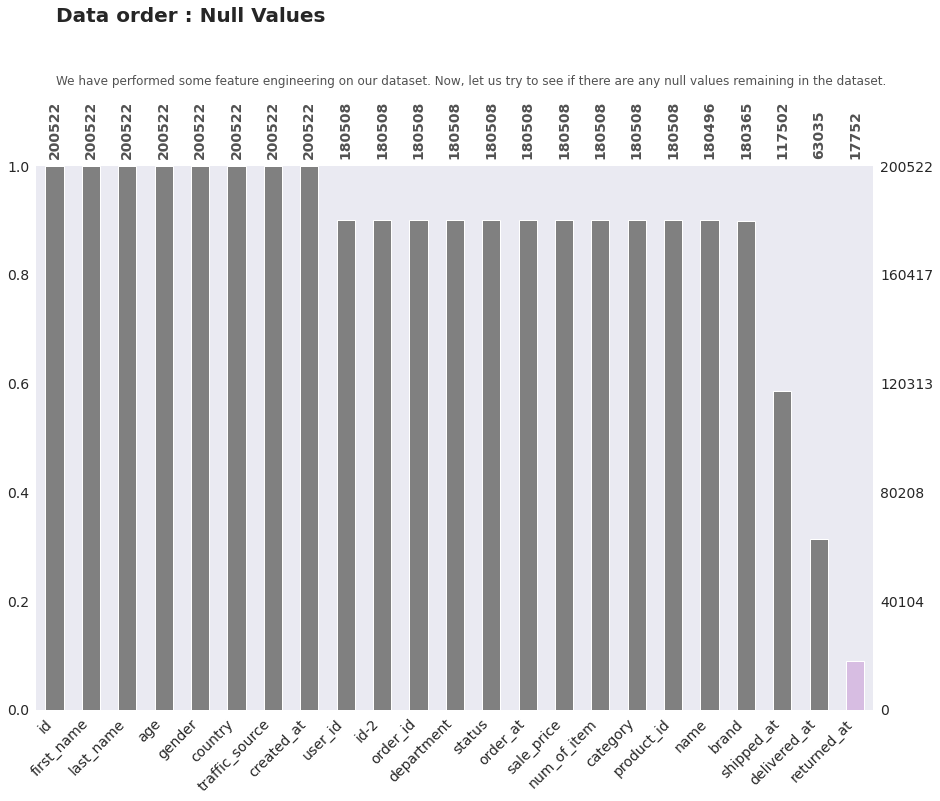

In [ ]:
sns.set_style('dark')
color = ['grey','grey','grey','grey','grey','grey','grey','grey','grey','grey','grey','grey', 
         'grey','grey','grey','grey','grey','grey', 'grey','grey','grey','grey','#D7BDE2']
msno.bar(data,fontsize =14, color = color, sort = 'descending', figsize = (15,10))

plt.text(0.05,1.265,'Data order : Null Values', { 'size':20, 'weight':'bold'})
plt.text(0.05,1.15,'''We have performed some feature engineering on our dataset. Now, let us try to see if there are any null values remaining in the dataset.''', { 'size':12, 'weight':'normal'}, alpha = 0.8)
plt.xticks( rotation = 90, 
                   **{'size':14,'weight':'bold','horizontalalignment': 'center'},alpha = 0.8)

plt.show()

### Unique value

In [ ]:
for feature in data.columns:
    print(
        f"- jumlah unique value pada `{feature}`:",
        data[feature].nunique()
    )

- jumlah unique value pada `id`: 100000
- jumlah unique value pada `first_name`: 690
- jumlah unique value pada `last_name`: 1000
- jumlah unique value pada `age`: 59
- jumlah unique value pada `gender`: 2
- jumlah unique value pada `country`: 15
- jumlah unique value pada `traffic_source`: 5
- jumlah unique value pada `created_at`: 96768
- jumlah unique value pada `id-2`: 180508
- jumlah unique value pada `order_id`: 124512
- jumlah unique value pada `user_id`: 79986
- jumlah unique value pada `product_id`: 29050
- jumlah unique value pada `status`: 5
- jumlah unique value pada `order_at`: 180172
- jumlah unique value pada `shipped_at`: 77625
- jumlah unique value pada `delivered_at`: 42494
- jumlah unique value pada `returned_at`: 12065
- jumlah unique value pada `sale_price`: 4187
- jumlah unique value pada `num_of_item`: 4
- jumlah unique value pada `category`: 26
- jumlah unique value pada `name`: 27247
- jumlah unique value pada `brand`: 2754
- jumlah unique value pada `departmen

In [ ]:
print(data['status'].value_counts())
print(data['traffic_source'].value_counts())

Shipped       54467
Complete      45283
Processing    36225
Cancelled     26781
Returned      17752
Name: status, dtype: int64
Search      140659
Organic      29801
Facebook     12317
Email         9766
Display       7979
Name: traffic_source, dtype: int64


### **Handling Missing Value**

In [ ]:
data.isna().sum()

id                     0
first_name             0
last_name              0
age                    0
gender                 0
country                0
traffic_source         0
created_at             0
id-2               20014
order_id           20014
user_id            20014
product_id         20014
status             20014
order_at           20014
shipped_at         83020
delivered_at      137487
returned_at       182770
sale_price         20014
num_of_item        20014
category           20014
name               20026
brand              20157
department         20014
dtype: int64

In [ ]:
data1 = data.dropna(axis=0, thresh=15)


In [ ]:
# Pilih kolom dan isi missing value 
data1[["shipped_at", "delivered_at", "returned_at"]] = data1[["shipped_at", "delivered_at", "returned_at"]].fillna("-")
data1[["name"]] = data1[["name"]].fillna("unknown")
data1[["brand"]] = data1[["brand"]].fillna("no brand")

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
data1.isna().sum()

id                0
first_name        0
last_name         0
age               0
gender            0
country           0
traffic_source    0
created_at        0
id-2              0
order_id          0
user_id           0
product_id        0
status            0
order_at          0
shipped_at        0
delivered_at      0
returned_at       0
sale_price        0
num_of_item       0
category          0
name              0
brand             0
department        0
dtype: int64

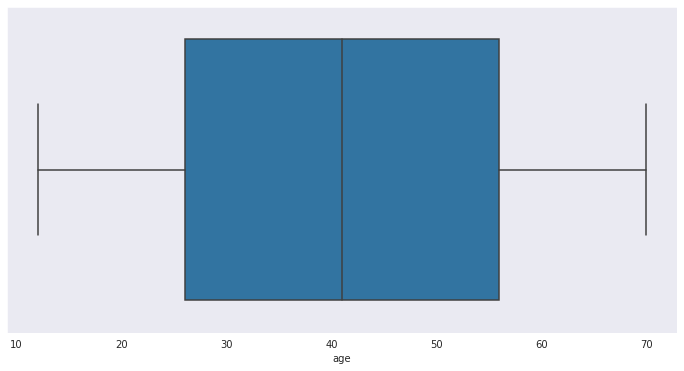

In [ ]:
plt.figure(figsize = (12,6))
sns.boxplot (x="age", data=data)
plt.show()

In [ ]:
# Memilih semua data dengan status "processing"
data[data['status'] == "Processing"]

,id,first_name,last_name,age,gender,country,traffic_source,created_at,id-2,order_id,...,order_at,shipped_at,delivered_at,returned_at,sale_price,num_of_item,category,name,brand,department
11,50261,Brian,Silva,12,M,United States,Organic,2020-12-08 14:20:00.000000,90219.0,62498.0,...,2021-08-02 10:31:32.000000,NaT,NaT,NaT,5.000000,1.0,Active,LRG Crew Sock,LRG,Men
13,88906,Chelsey,Mcneil,44,F,South Korea,Facebook,2019-04-18 13:27:00.000000,160272.0,110699.0,...,2022-01-28 11:02:19.000000,NaT,NaT,NaT,5.500000,4.0,Leggings,17 Inches Seamless Leggings White,FineBrandShop,Women
20,28298,Kayla,Waters,27,F,France,Search,2022-05-17 16:21:00.000000,50596.0,35002.0,...,2022-05-20 14:49:43.000000,NaT,NaT,NaT,6.000000,4.0,Intimates,Maidenform Women's Bra Strap Holder,Maidenform,Women
21,88828,Brett,Mitchell,24,M,United Kingdom,Search,2022-04-22 11:35:00.000000,160127.0,110606.0,...,2022-05-08 10:40:57.000000,NaT,NaT,NaT,6.000000,2.0,Socks,LRG Core Collection The Core Collection Panda ...,LRG,Men
22,90855,Debra,Lewis,12,F,China,Search,2021-02-21 04:59:00.000000,163764.0,113135.0,...,2022-01-19 02:26:48.000000,NaT,NaT,NaT,6.000000,3.0,Plus,Croakies Micro Suiter Eyewear Retainer,Croakies,Women
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294987,1701,Michele,Ford,20,F,South Korea,Search,2022-06-01 00:47:54.386987,3080.0,2133.0,...,2022-06-01 23:08:58.386987,NaT,NaT,NaT,72.779999,1.0,Blazers & Jackets,Dept Denim Department Women's Lurex Boucle Jacket,Dept Denim Department,Women
294988,50803,Michael,Brown,70,M,China,Search,2019-04-18 13:47:00.000000,91243.0,63208.0,...,2020-10-06 12:41:41.000000,NaT,NaT,NaT,73.029999,1.0,Tops & Tees,7 Diamonds Men's Ace Of Spades Woven,7 Diamonds,Men
294995,71531,Brandon,Salinas,21,M,Brasil,Search,2022-04-20 08:56:00.000000,128996.0,89161.0,...,2022-04-25 08:45:55.000000,NaT,NaT,NaT,15.160000,2.0,Shorts,Allegra K Men Straight Belt Loop Slant Pockets...,Allegra K,Men
294998,81583,Devin,Burgess,19,M,South Korea,Search,2019-07-28 01:55:00.000000,147162.0,101681.0,...,2020-07-07 00:06:16.000000,NaT,NaT,NaT,15.660000,1.0,Sweaters,Allegra K Mens Stylish UK Style V-Neck Slim Fi...,Allegra K,Men


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200522 entries, 0 to 301521
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   id              200522 non-null  int64         
 1   first_name      200522 non-null  object        
 2   last_name       200522 non-null  object        
 3   age             200522 non-null  int64         
 4   gender          200522 non-null  object        
 5   country         200522 non-null  object        
 6   traffic_source  200522 non-null  object        
 7   created_at      200522 non-null  datetime64[ns]
 8   id-2            180508 non-null  float64       
 9   order_id        180508 non-null  float64       
 10  user_id         180508 non-null  float64       
 11  product_id      180508 non-null  float64       
 12  status          180508 non-null  object        
 13  order_at        180508 non-null  datetime64[ns]
 14  shipped_at      117502 non-null  dat

# **Visualisasi Data**

In [ ]:
def plot_count(data, x=None, y=None, palette=None, figsize=(12, 6), **kwargs):
    column_order = data[x or y].value_counts().index

    plt.figure(figsize=figsize)
    sns.countplot(
        x=x, y=y, data=data, order=column_order,
        palette=palette, **kwargs
    )
    plt.grid(False)


MAIN_COLOR = ["#29B5BF"]    # warna utama untuk visualisasi
OTHER_COLOR = ["#777777"]    # warna lainnya untuk visualisasi

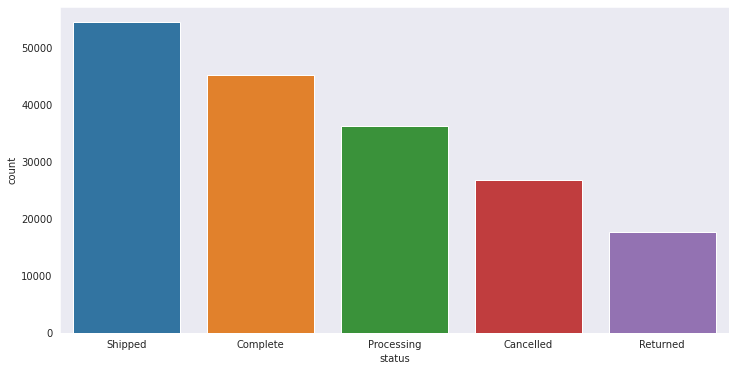

In [ ]:
plot_count(x="status", data=data)

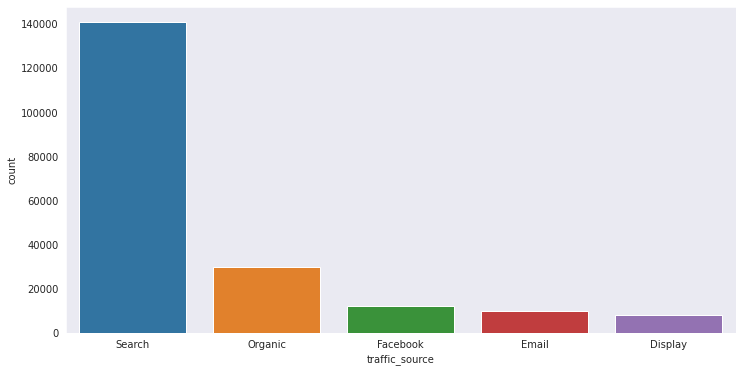

In [ ]:
plot_count(x="traffic_source", data=data)

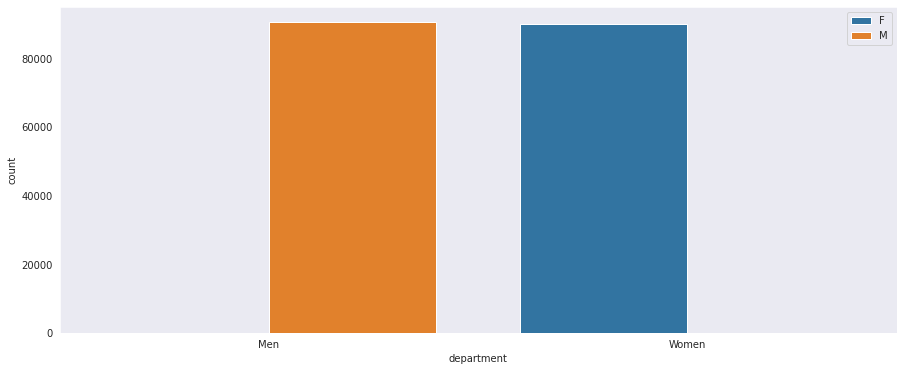

In [ ]:
plot_count(x="department", hue="gender",data=data1, figsize=(15, 6))
plt.legend(loc="upper right")
plt.show()

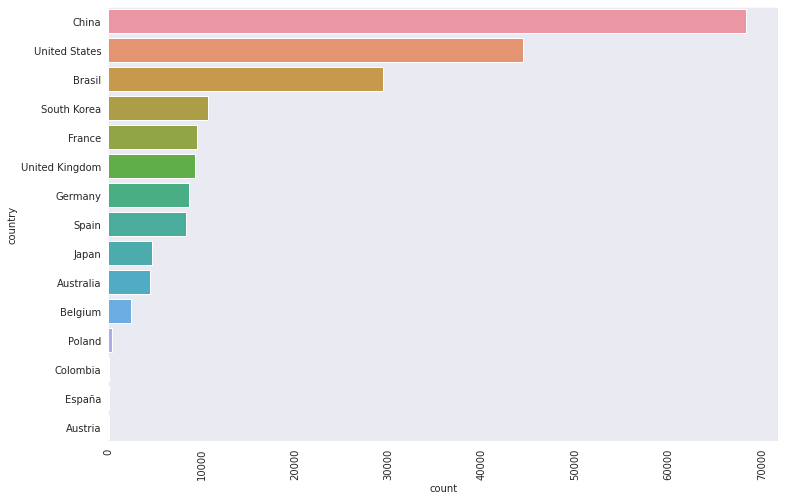

In [ ]:
plot_count(y="country", data=data, figsize=(12, 8))
plt.xticks(rotation=90)
plt.show()

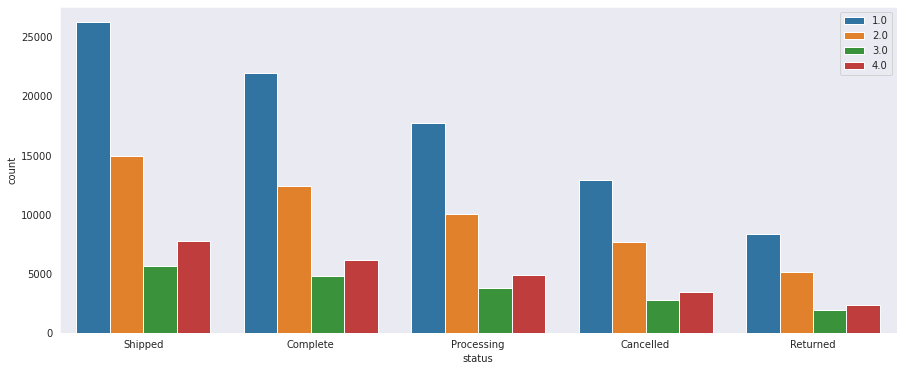

In [ ]:
plot_count(x="status", hue="num_of_item",data=data, figsize=(15, 6))
plt.legend(loc="upper right")
plt.show()


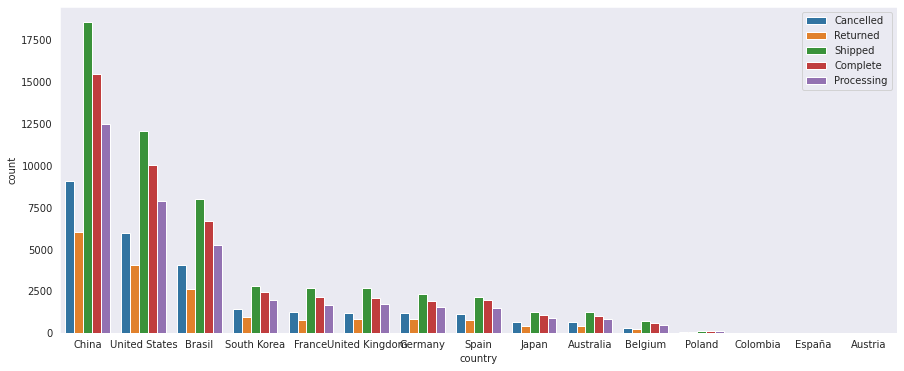

In [ ]:
plot_count(x="country", hue="status",data=data, figsize=(15, 6))
plt.legend(loc="upper right")
plt.show()


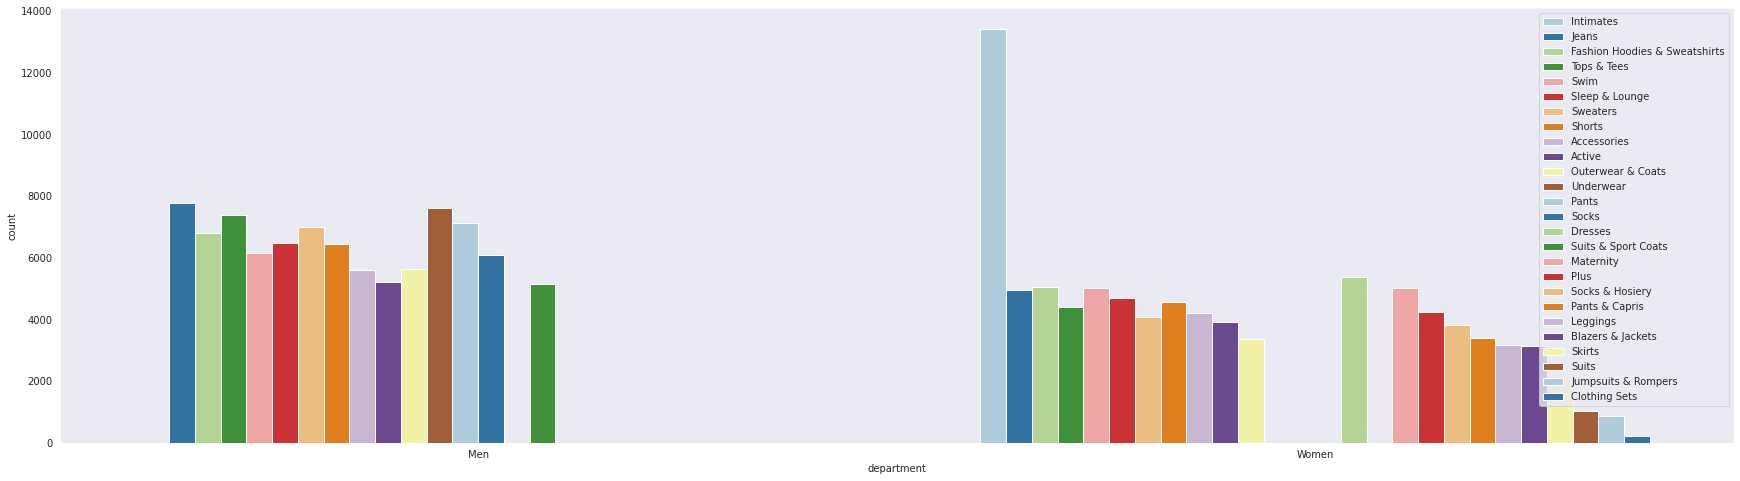

In [ ]:
df_ladies_mens = data[data.department.isin(["Men", "Women"])
]
plot_count(
    hue="category",
    x="department",
    data=df_ladies_mens,
    palette="Paired",
    figsize=(30, 8),
    hue_order=data.category.value_counts().index
)
plt.legend(loc="upper right")

# **Data Modelling**

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180508 entries, 0 to 294999
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   id              180508 non-null  int64         
 1   first_name      180508 non-null  object        
 2   last_name       180508 non-null  object        
 3   age             180508 non-null  int64         
 4   gender          180508 non-null  object        
 5   country         180508 non-null  object        
 6   traffic_source  180508 non-null  object        
 7   created_at      180508 non-null  datetime64[ns]
 8   id-2            180508 non-null  float64       
 9   order_id        180508 non-null  float64       
 10  user_id         180508 non-null  float64       
 11  product_id      180508 non-null  float64       
 12  status          180508 non-null  object        
 13  order_at        180508 non-null  datetime64[ns]
 14  shipped_at      180508 non-null  obj

In [ ]:
data1.columns

Index(['id', 'first_name', 'last_name', 'age', 'gender', 'country',
       'traffic_source', 'created_at', 'id-2', 'order_id', 'user_id',
       'product_id', 'status', 'order_at', 'shipped_at', 'delivered_at',
       'returned_at', 'sale_price', 'num_of_item', 'category', 'name', 'brand',
       'department'],
      dtype='object')

In [ ]:
data1.drop(columns=[  'id', 'first_name', 'last_name', 'created_at', 'shipped_at', 'delivered_at', 'returned_at', 
                    'name',  'department'  ], inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


> Selanjutnya, untuk melihat behavior dari tiap customer dalam melakukan transaksi, kita akan coba untuk mendapatkan fitur seperti:
* jumlah total produk yang dipesan
* jumlah jenis brand yang dipilih
* total uang yang dikeluarkan
* rata-rata transaksi
* jumlah hari transaksi
* jumlah varian kategori



In [ ]:
df_users_agg = data1.groupby('user_id').agg(
    total_items_bought=pd.NamedAgg(
        column="num_of_item", aggfunc=lambda x: len(list(x))
    ),
    count_brand_bought=pd.NamedAgg(
        column="brand", aggfunc=lambda x: len(set(x))
    ),
    total_spending=pd.NamedAgg(
        column="sale_price", aggfunc=lambda x: sum(x)
    ),
    avg_spending=pd.NamedAgg(
        column="sale_price", aggfunc=lambda x: np.mean(x)
    ),
    count_ordering_day=pd.NamedAgg(
        column="order_at", aggfunc=lambda x: len(set(x))
    ),
    count_category_bought=pd.NamedAgg(
        column="category", aggfunc=lambda x: len(set(x))
    ),
).reset_index()

In [ ]:
df_users_agg.head(3)

,user_id,total_items_bought,count_brand_bought,total_spending,avg_spending,count_ordering_day,count_category_bought
0,1.0,8,8,352.960001,44.120000,8,6
1,3.0,2,2,32.990000,16.495000,2,2
2,4.0,2,2,141.789997,70.894999,2,2


In [ ]:
df_users_agg.describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
user_id,79986.0,50010.012,28839.965,1.00,25055.250,49995.500,74990.500,100000.00
total_items_bought,79986.0,2.257,1.599,1.00,1.000,2.000,3.000,13.00
count_brand_bought,79986.0,2.242,1.577,1.00,1.000,2.000,3.000,13.00
total_spending,79986.0,134.953,137.854,0.49,41.753,89.600,182.092,1860.95
avg_spending,79986.0,59.716,52.723,0.49,29.977,46.686,72.000,999.00
count_ordering_day,79986.0,2.257,1.599,1.00,1.000,2.000,3.000,13.00
count_category_bought,79986.0,2.092,1.358,1.00,1.000,2.000,3.000,10.00


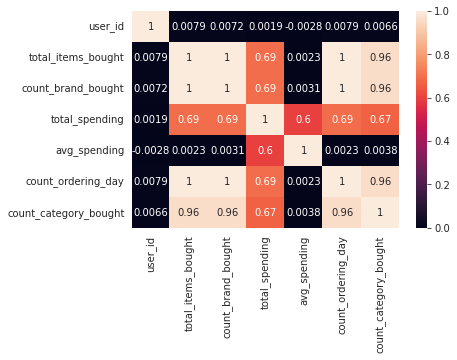

In [ ]:
sns.heatmap(df_users_agg.corr(), annot=True)
plt.show()

In [ ]:
df_status_agg = data1.groupby('status').agg(
    total_items_bought=pd.NamedAgg(
        column="num_of_item", aggfunc=lambda x: len(list(x))
    ),
    count_brand_bought=pd.NamedAgg(
        column="brand", aggfunc=lambda x: len(set(x))
    ),
    total_spending=pd.NamedAgg(
        column="sale_price", aggfunc=lambda x: sum(x)
    ),
    avg_spending=pd.NamedAgg(
        column="sale_price", aggfunc=lambda x: np.mean(x)
    ),
    count_buying_day=pd.NamedAgg(
        column="order_at", aggfunc=lambda x: len(set(x))
    ),
    count_category_bought=pd.NamedAgg(
        column="category", aggfunc=lambda x: len(set(x))
    ),
).reset_index()

In [ ]:
df_status_agg

,status,total_items_bought,count_brand_bought,total_spending,avg_spending,count_buying_day,count_category_bought
0,Cancelled,26781,2295,1.597507e+06,59.650749,26772,26
1,Complete,45283,2541,2.700569e+06,59.637594,45260,26
2,Processing,36225,2423,2.168918e+06,59.873505,36215,26
3,Returned,17752,2058,1.065178e+06,60.003264,17749,26
4,Shipped,54467,2592,3.262183e+06,59.892833,54435,26


In [ ]:
df_status_agg.describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
total_items_bought,5.0,36101.600,14536.013,17752.000,26781.000,36225.000,45283.000,54467.000
count_brand_bought,5.0,2381.800,214.247,2058.000,2295.000,2423.000,2541.000,2592.000
total_spending,5.0,2158870.896,869213.642,1065177.951,1597506.702,2168917.732,2700569.163,3262182.933
avg_spending,5.0,59.812,0.161,59.638,59.651,59.874,59.893,60.003
count_buying_day,5.0,36086.200,14524.642,17749.000,26772.000,36215.000,45260.000,54435.000
count_category_bought,5.0,26.000,0.000,26.000,26.000,26.000,26.000,26.000


> Selanjutnya, dari data transaksi per artikel (produk), kita akan coba untuk mendapatkan fitur seperti:
* total penjualan yang berhasil
* gmv (Gross Merchandise Value) per produk
* jumlah customer yang telah membeli produk tersebut

In [ ]:
data_complete1 = data1[data1['status'] == 'Complete']

data_complete1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45283 entries, 8 to 294997
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   age             45283 non-null  int64         
 1   gender          45283 non-null  object        
 2   country         45283 non-null  object        
 3   traffic_source  45283 non-null  object        
 4   id-2            45283 non-null  float64       
 5   order_id        45283 non-null  float64       
 6   user_id         45283 non-null  float64       
 7   product_id      45283 non-null  float64       
 8   status          45283 non-null  object        
 9   order_at        45283 non-null  datetime64[ns]
 10  sale_price      45283 non-null  float64       
 11  num_of_item     45283 non-null  float64       
 12  category        45283 non-null  object        
 13  brand           45283 non-null  object        
dtypes: datetime64[ns](1), float64(6), int64(1), object(6)

In [ ]:
process = data1[data1['status'] == 'Processing']

In [ ]:
shipped = data1[data1['status'] == 'Shipped']

In [ ]:
shipped.sort_values('order_at', ascending=True)

,age,gender,country,traffic_source,id-2,order_id,user_id,product_id,status,order_at,sale_price,num_of_item,category,brand
35052,18,M,Brasil,Display,161145.0,111307.0,89387.0,26986.0,Shipped,2019-01-29 21:56:20.000000,80.459999,1.0,Sleep & Lounge,HUGO BOSS
184481,25,M,South Korea,Search,137649.0,95214.0,76388.0,21094.0,Shipped,2019-01-31 04:54:43.000000,64.989998,1.0,Jeans,Altamont
236620,31,F,Brasil,Search,59099.0,40872.0,33010.0,1308.0,Shipped,2019-02-01 02:26:28.000000,29.950001,1.0,Sweaters,2b by bebe
240668,64,F,Brasil,Search,42267.0,29282.0,23633.0,11005.0,Shipped,2019-02-01 22:37:53.000000,6.990000,2.0,Intimates,George
169213,39,M,United States,Search,58572.0,40527.0,32743.0,28734.0,Shipped,2019-02-02 04:59:49.000000,26.990000,2.0,Accessories,Marine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97869,39,M,United States,Organic,33167.0,23001.0,18631.0,19288.0,Shipped,2022-06-06 15:57:51.491071,13.010000,4.0,Sweaters,Allegra K
94400,39,M,United States,Organic,33165.0,23001.0,18631.0,28423.0,Shipped,2022-06-06 16:08:52.491071,15.990000,4.0,Accessories,NEFF
92681,68,M,Brasil,Organic,45843.0,31732.0,25652.0,19610.0,Shipped,2022-06-06 16:18:37.000000,95.000000,2.0,Sweaters,Blarney Woollen Mills
90687,39,M,United States,Organic,33168.0,23001.0,18631.0,18091.0,Shipped,2022-06-06 16:58:02.491071,65.000000,4.0,Active,Duofold


In [ ]:
df_products_agg = data_complete1.groupby("order_id").agg(
    total_sold=pd.NamedAgg(column="order_id", aggfunc="count"),
    gmv_per_product=pd.NamedAgg(column="sale_price", aggfunc=lambda x: sum(x)*len(x)),
    count_customer_bought=pd.NamedAgg(
        column="user_id", aggfunc=lambda x: len(set(x))
    )
).reset_index()

In [ ]:
df_products_agg.tail(10)

,order_id,total_sold,gmv_per_product,count_customer_bought
31259,124481.0,1,20.990000,1
31260,124483.0,4,559.200005,1
31261,124485.0,4,438.159988,1
31262,124488.0,1,5.950000,1
31263,124490.0,1,56.000000,1
31264,124495.0,1,19.950001,1
31265,124499.0,2,415.899994,1
31266,124501.0,1,12.390000,1
31267,124505.0,1,94.949997,1
31268,124506.0,2,89.980000,1


In [ ]:
df_products_agg.describe().round(2)

,order_id,total_sold,gmv_per_product,count_customer_bought
count,31269.00,31269.00,31269.00,31269.0
mean,62489.02,1.45,163.31,1.0
std,35958.33,0.80,273.54,0.0
min,1.00,1.00,0.02,1.0
25%,31626.00,1.00,29.99,1.0
50%,62491.00,1.00,62.00,1.0
75%,93654.00,2.00,169.00,1.0
max,124506.00,4.00,4403.92,1.0


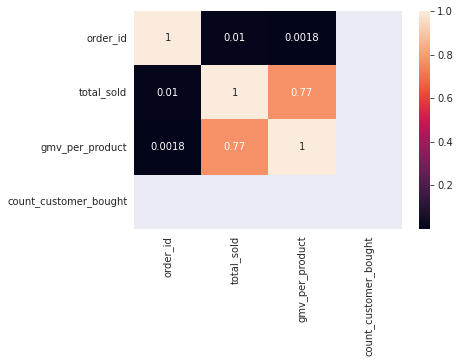

In [ ]:
# Visualisasikan hubungan antara variabel numerik pada df_articles_agg
sns.heatmap(df_products_agg.corr(), annot=True)
plt.show()

## **Preparation**

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180508 entries, 0 to 294999
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   age             180508 non-null  int64         
 1   gender          180508 non-null  object        
 2   country         180508 non-null  object        
 3   traffic_source  180508 non-null  object        
 4   id-2            180508 non-null  float64       
 5   order_id        180508 non-null  float64       
 6   user_id         180508 non-null  float64       
 7   product_id      180508 non-null  float64       
 8   status          180508 non-null  object        
 9   order_at        180508 non-null  datetime64[ns]
 10  sale_price      180508 non-null  float64       
 11  num_of_item     180508 non-null  float64       
 12  category        180508 non-null  object        
 13  brand           180508 non-null  object        
dtypes: datetime64[ns](1), float64(6), in

In [ ]:
data1.drop(columns=[ 'id-2', 'order_id',  'product_id', 'category',
            'sale_price', 'num_of_item', 'brand' ], inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
X = df_users_agg.merge(data1, how="left", on="user_id")
X.drop(columns=["user_id","order_at"], inplace=True)
X.head()

,total_items_bought,count_brand_bought,total_spending,avg_spending,count_ordering_day,count_category_bought,age,gender,country,traffic_source,status
0,8,8,352.960001,44.12,8,6,30,M,South Korea,Search,Cancelled
1,8,8,352.960001,44.12,8,6,30,M,South Korea,Search,Complete
2,8,8,352.960001,44.12,8,6,30,M,South Korea,Search,Cancelled
3,8,8,352.960001,44.12,8,6,30,M,South Korea,Search,Processing
4,8,8,352.960001,44.12,8,6,30,M,South Korea,Search,Complete


In [ ]:
X.shape

(180508, 11)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180508 entries, 0 to 180507
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   total_items_bought     180508 non-null  int64  
 1   count_brand_bought     180508 non-null  int64  
 2   total_spending         180508 non-null  float64
 3   avg_spending           180508 non-null  float64
 4   count_ordering_day     180508 non-null  int64  
 5   count_category_bought  180508 non-null  int64  
 6   age                    180508 non-null  int64  
 7   gender                 180508 non-null  object 
 8   country                180508 non-null  object 
 9   traffic_source         180508 non-null  object 
 10  status                 180508 non-null  object 
dtypes: float64(2), int64(5), object(4)
memory usage: 16.5+ MB


In [ ]:
encoder = OneHotEncoder()
encoder.fit(X.select_dtypes(include="object"))
X_onehot = pd.DataFrame(encoder.transform(X.select_dtypes(include="object")).toarray(),columns=encoder.get_feature_names_out())

X_preprocessed = pd.concat([X.select_dtypes(exclude="object"), X_onehot],axis=1)

scaler = StandardScaler()
scaler.fit(X_preprocessed)
X_scaled = pd.DataFrame(scaler.transform(X_preprocessed),columns=X_preprocessed.columns)

X_scaled.head()

,total_items_bought,count_brand_bought,total_spending,avg_spending,count_ordering_day,count_category_bought,age,gender_F,gender_M,country_Australia,...,traffic_source_Display,traffic_source_Email,traffic_source_Facebook,traffic_source_Organic,traffic_source_Search,status_Cancelled,status_Complete,status_Processing,status_Returned,status_Shipped
0,2.24822,2.301866,0.873254,-0.357282,2.24822,1.780552,-0.652817,-0.997267,0.997267,-0.151632,...,-0.203928,-0.225789,-0.256685,-0.417981,0.653053,2.395861,-0.578681,-0.501068,-0.330259,-0.657371
1,2.24822,2.301866,0.873254,-0.357282,2.24822,1.780552,-0.652817,-0.997267,0.997267,-0.151632,...,-0.203928,-0.225789,-0.256685,-0.417981,0.653053,-0.417386,1.728068,-0.501068,-0.330259,-0.657371
2,2.24822,2.301866,0.873254,-0.357282,2.24822,1.780552,-0.652817,-0.997267,0.997267,-0.151632,...,-0.203928,-0.225789,-0.256685,-0.417981,0.653053,2.395861,-0.578681,-0.501068,-0.330259,-0.657371
3,2.24822,2.301866,0.873254,-0.357282,2.24822,1.780552,-0.652817,-0.997267,0.997267,-0.151632,...,-0.203928,-0.225789,-0.256685,-0.417981,0.653053,-0.417386,-0.578681,1.995737,-0.330259,-0.657371
4,2.24822,2.301866,0.873254,-0.357282,2.24822,1.780552,-0.652817,-0.997267,0.997267,-0.151632,...,-0.203928,-0.225789,-0.256685,-0.417981,0.653053,-0.417386,1.728068,-0.501068,-0.330259,-0.657371


In [ ]:
K = 5
kmeans_5 = KMeans(n_clusters=K, random_state=11)

start = time()
kmeans_5.fit(X_scaled)
print(f"Done fitting kMeans in {time()-start:.3f}s")

Done fitting kMeans in 4.665s


In [ ]:
K = 15
kmeans_15 = KMeans(n_clusters=K, random_state=11)

start = time()
kmeans_15.fit(X_scaled)
print(f"Done fitting kMeans in {time()-start:.3f}s")

Done fitting kMeans in 10.840s


In [ ]:
K = 15
mb_kmeans_15 = MiniBatchKMeans(n_clusters=K)

start = time()
mb_kmeans_15.fit(X_scaled)
print(f"Done fitting kMeans in {time()-start:.3f}s")

Done fitting kMeans in 0.257s


In [ ]:
X = X.assign(
    clusters_of_5=kmeans_5.predict(X_scaled),
    clusters_of_15=kmeans_15.predict(X_scaled),
    clusters_of_15_mb=mb_kmeans_15.predict(X_scaled),
)

with pd.option_context("display.max_columns", None):
    display(X.head())

,total_items_bought,count_brand_bought,total_spending,avg_spending,count_ordering_day,count_category_bought,age,gender,country,traffic_source,status,clusters_of_5,clusters_of_15,clusters_of_15_mb
0,8,8,352.960001,44.12,8,6,30,M,South Korea,Search,Cancelled,4,12,14
1,8,8,352.960001,44.12,8,6,30,M,South Korea,Search,Complete,4,12,14
2,8,8,352.960001,44.12,8,6,30,M,South Korea,Search,Cancelled,4,12,14
3,8,8,352.960001,44.12,8,6,30,M,South Korea,Search,Processing,4,12,14
4,8,8,352.960001,44.12,8,6,30,M,South Korea,Search,Complete,4,12,14


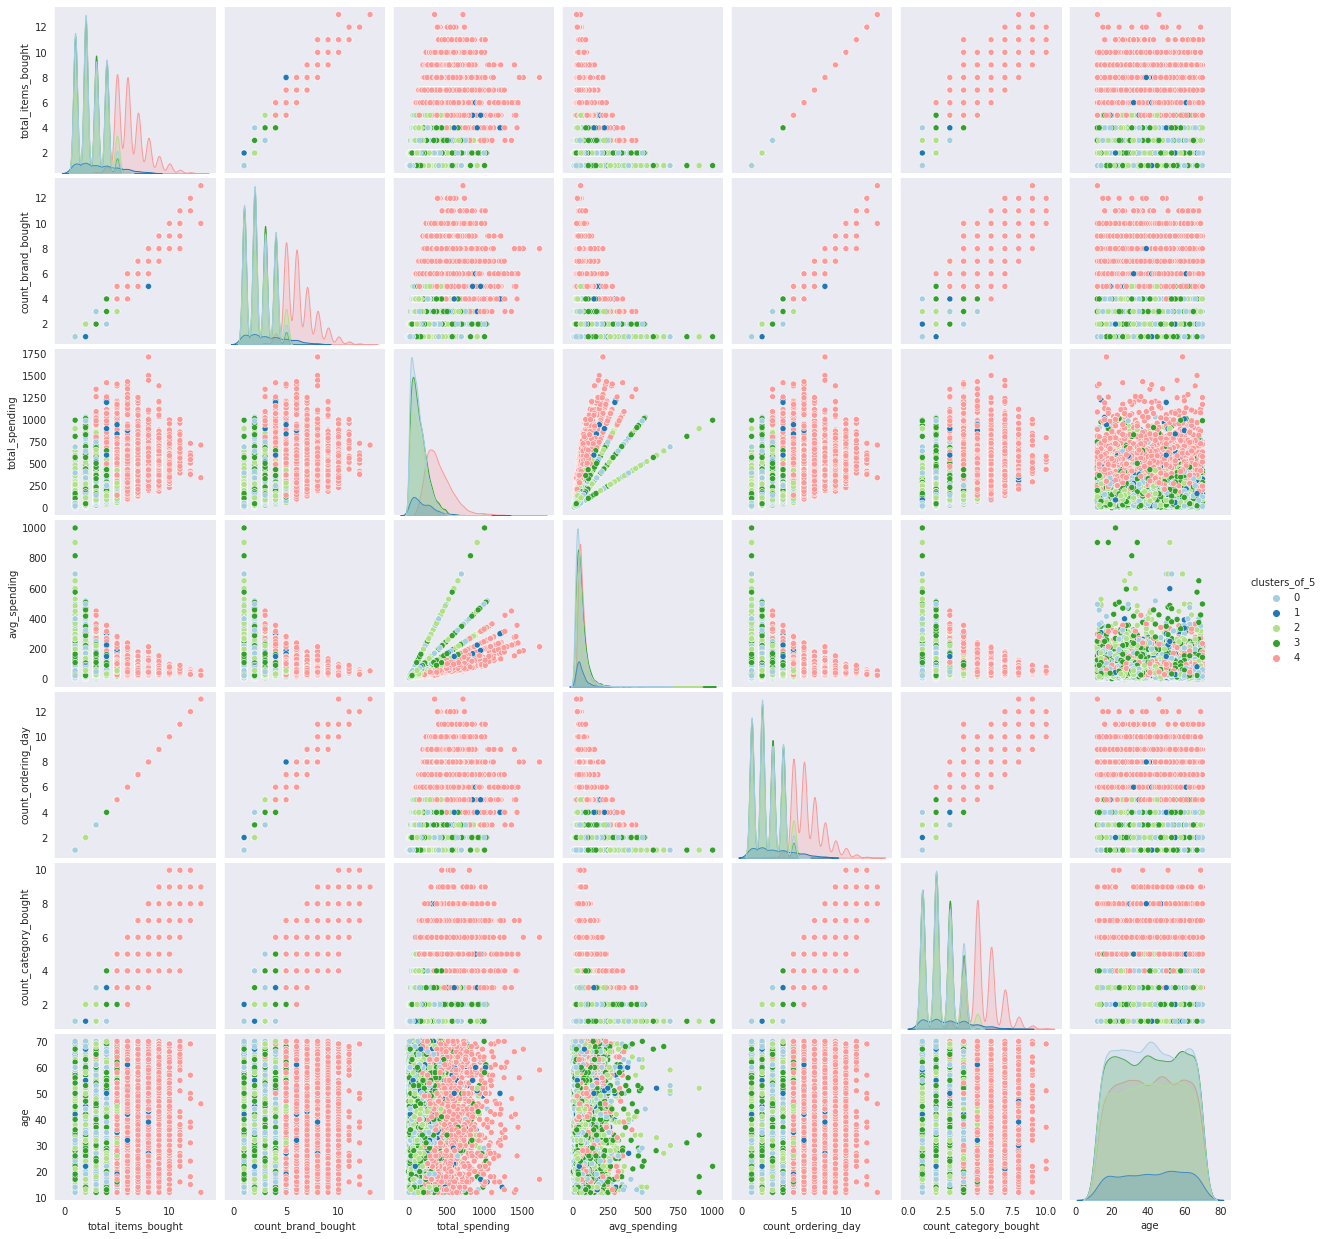

In [ ]:
result = X.sample(frac=.2, random_state=11).drop(columns=["clusters_of_15", "clusters_of_15_mb"])
sns.pairplot(result, hue="clusters_of_5", palette="Paired")
plt.show()

# **Model Evaluation**

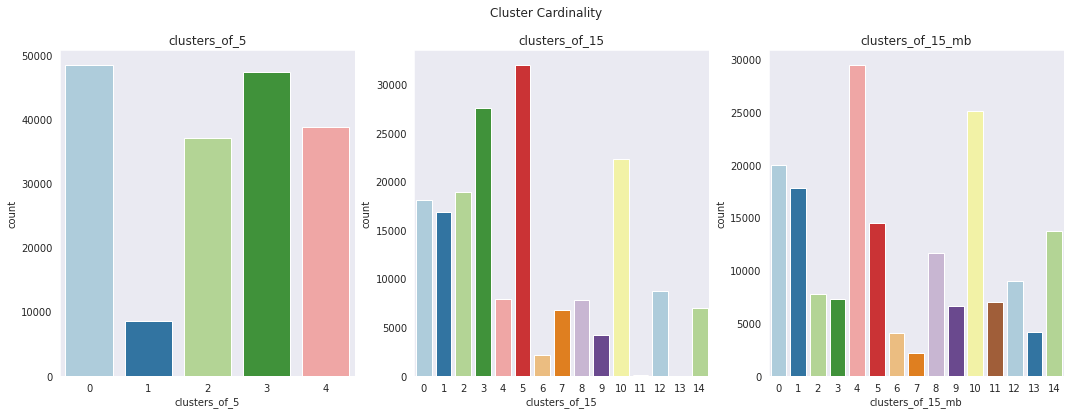

In [ ]:
fig, axis = plt.subplots(1, 3, figsize=(18, 6))
for ax, preds in zip(axis, ["clusters_of_5", "clusters_of_15", "clusters_of_15_mb"]):
    sns.countplot(x=preds, data=X, ax=ax, palette="Paired")
    ax.set_title(preds)
plt.suptitle("Cluster Cardinality")
plt.show()

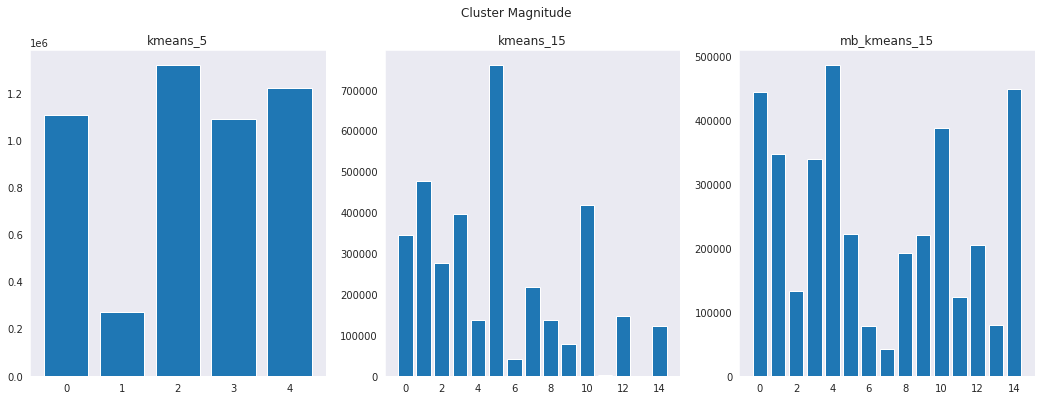

In [ ]:
fig, axis = plt.subplots(1, 3, figsize=(18, 6))
for ax, model, name in zip(axis,[kmeans_5, kmeans_15, mb_kmeans_15],["kmeans_5", "kmeans_15", "mb_kmeans_15"]):
    distances = model.transform(X_scaled)
    preds = model.predict(X_scaled)
    inertia_per_cluster = np.array([sum(dist[c]**2 for dist, c in zip(distances, preds) if c == cluster)
        for cluster in range(model.n_clusters)])
    ax.bar(x=range(model.n_clusters), height=inertia_per_cluster)
    ax.set_title(name)
plt.suptitle("Cluster Magnitude")
plt.show()

In [ ]:
# sum of squared distances
ssd = []

# may take a longer time to run
for k in range(1, 15):
    model = KMeans(n_clusters=k, random_state=11)
    print(f"Clustering with n_clusters={k}")
    start = time()
    model.fit(X_scaled)
    print(f"Done clustering in {time()-start:.3f}s")

    ssd.append(model.inertia_)

Clustering with n_clusters=1
Done clustering in 0.866s
Clustering with n_clusters=2
Done clustering in 2.123s
Clustering with n_clusters=3
Done clustering in 3.066s
Clustering with n_clusters=4
Done clustering in 3.621s
Clustering with n_clusters=5
Done clustering in 4.505s
Clustering with n_clusters=6
Done clustering in 6.704s
Clustering with n_clusters=7
Done clustering in 6.347s
Clustering with n_clusters=8
Done clustering in 5.961s
Clustering with n_clusters=9
Done clustering in 6.905s
Clustering with n_clusters=10
Done clustering in 8.959s
Clustering with n_clusters=11
Done clustering in 8.699s
Clustering with n_clusters=12
Done clustering in 9.149s
Clustering with n_clusters=13
Done clustering in 9.544s
Clustering with n_clusters=14
Done clustering in 9.317s


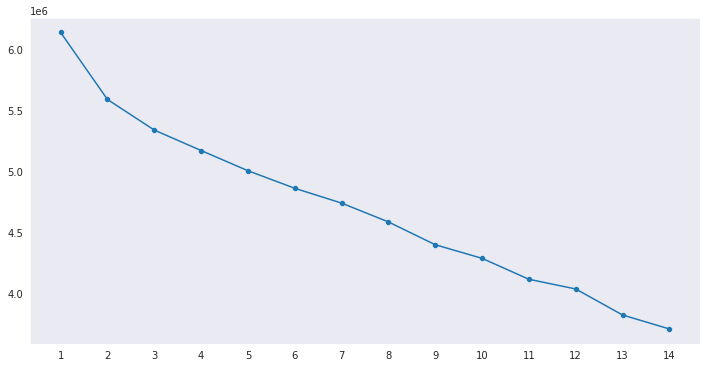

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=range(1, 15), y=ssd)
sns.scatterplot(x=range(1, 15), y=ssd)
plt.xticks(range(1, 15))
plt.show()

berdasarkan hasil elbow method k yang dipilih = 9

In [ ]:
K = 9
kmeans_9 = KMeans(n_clusters=K, random_state=11)

start = time()
kmeans_9.fit(X_scaled)
print(f"Done fitting kMeans in {time()-start:.3f}s")

Done fitting kMeans in 7.071s


In [ ]:
X["cluster"]=kmeans_9.labels_

In [ ]:
X.head()

,total_items_bought,count_brand_bought,total_spending,avg_spending,count_ordering_day,count_category_bought,age,gender,country,traffic_source,status,clusters_of_5,clusters_of_15,clusters_of_15_mb,cluster
0,8,8,352.960001,44.12,8,6,30,M,South Korea,Search,Cancelled,4,12,14,5
1,8,8,352.960001,44.12,8,6,30,M,South Korea,Search,Complete,4,12,14,5
2,8,8,352.960001,44.12,8,6,30,M,South Korea,Search,Cancelled,4,12,14,5
3,8,8,352.960001,44.12,8,6,30,M,South Korea,Search,Processing,4,12,14,5
4,8,8,352.960001,44.12,8,6,30,M,South Korea,Search,Complete,4,12,14,5


In [ ]:
data_cluster =X.select_dtypes('number').drop(columns=['clusters_of_5','clusters_of_15', 'clusters_of_15_mb' ])

In [ ]:
data_cluster[:-1]

,total_items_bought,count_brand_bought,total_spending,avg_spending,count_ordering_day,count_category_bought,age,cluster
0,8,8,352.960001,44.120000,8,6,30,5
1,8,8,352.960001,44.120000,8,6,30,5
2,8,8,352.960001,44.120000,8,6,30,5
3,8,8,352.960001,44.120000,8,6,30,5
4,8,8,352.960001,44.120000,8,6,30,5
...,...,...,...,...,...,...,...,...
180502,3,3,70.080000,23.360000,3,3,50,3
180503,3,3,70.080000,23.360000,3,3,50,3
180504,1,1,44.000000,44.000000,1,1,63,3
180505,1,1,75.000000,75.000000,1,1,43,8


In [ ]:
pd.pivot_table(
    data=data_cluster,
    index='cluster',
    aggfunc='mean'
)

,age,avg_spending,count_brand_bought,count_category_bought,count_ordering_day,total_items_bought,total_spending
cluster,,,,,,,
0,41.216710,59.080544,3.247567,2.908854,3.282459,3.282459,198.047076
1,41.432943,58.913743,2.749110,2.549100,2.767893,2.767893,160.258658
2,40.875112,58.168880,2.783449,2.571139,2.802441,2.802441,160.589698
3,41.018727,54.501499,2.468898,2.314942,2.484821,2.484821,132.492595
4,41.149001,58.908768,3.172409,2.875986,3.205418,3.205418,187.847647
5,41.121072,65.809056,6.343213,5.409755,6.434143,6.434143,411.185631
6,40.057754,57.095316,3.363347,3.030923,3.390177,3.390177,192.124266
7,45.523810,56.495714,5.190476,4.214286,5.190476,5.190476,260.451905
8,41.150003,61.927483,2.439064,2.264826,2.456114,2.456181,148.934276
